<a href="https://colab.research.google.com/github/kh984mo/iitj/blob/main/iitj_bioinnovate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Libraries**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the gene expression data**

In [3]:
data = pd.read_csv("GSE250323.csv")

**Preprocessing the data**

In [4]:
data['target_variable'] = data[['OE_1', 'OE_2', 'OE_3', 'Vector_1', 'Vector_2', 'Vector_3']].max(axis=1)
data['target_variable'] = data['target_variable'].apply(lambda x: 1 if x > 0 else 0)


pi3k_akt_genes = ['PIK3CA']
pi3k_akt_genes = [gene for gene in pi3k_akt_genes if gene in data.columns]

# Creating new features representing the expression levels of PI3K/AKT pathway genes
data['pi3k_akt_pathway_expression'] = data[pi3k_akt_genes].mean(axis=1)

X = data.drop(columns=['transcript_id', 'target_variable', 'pi3k_akt_pathway_expression'])  # Adjust columns based on your dataset
y = data['target_variable']


**Training the model**

In [5]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(random_state=42)
model = XGBClassifier(
    learning_rate=0.001,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=5,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27
)

**Cross-Validation**

In [6]:
cv_accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy')
cv_precision = cross_val_score(model, X, y, cv=5, scoring='precision')
cv_recall = cross_val_score(model, X, y, cv=5, scoring='recall')

print(f"Cross-Validation Accuracy: {cv_accuracy.mean()}")
print(f"Cross-Validation Precision: {cv_precision.mean()}")
print(f"Cross-Validation Recall: {cv_recall.mean()}")

# Fitting the model on the entire dataset for feature importances
model.fit(X_train, y_train)

Cross-Validation Accuracy: 1.0
Cross-Validation Precision: 1.0
Cross-Validation Recall: 1.0


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)

**Making Predictions**

In [7]:
# Predicting on the test set
predictions = model.predict(X_test)
predictions

array([0, 1, 0, ..., 1, 1, 0])

**Evaluation Metrics**

In [8]:
# Evaluating model performance on the test set
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

# Printing evaluation metrics on the test set
print(f"Test Set Accuracy: {accuracy}")
print(f"Test Set Precision: {precision}")
print(f"Test Set Recall: {recall}")

Test Set Accuracy: 1.0
Test Set Precision: 1.0
Test Set Recall: 1.0


**Model output**

Feature Importances:
OE_1: 0.5808771252632141
OE_2: 0.09771347045898438
OE_3: 0.21031838655471802
Vector_1: 0.03366382047533989
Vector_2: 0.052952129393815994
Vector_3: 0.024475080892443657


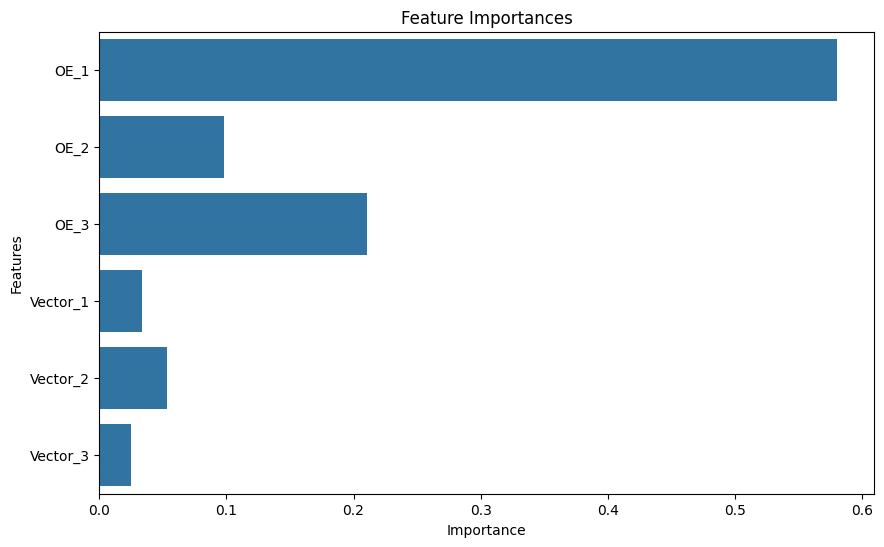

In [9]:
# Analyzing the model's output to identify important features
feature_importances = model.feature_importances_

# Visualizing the important features
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

# Creating compelling visualizations (e.g., heatmap, network diagram) showcasing important features
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X.columns)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


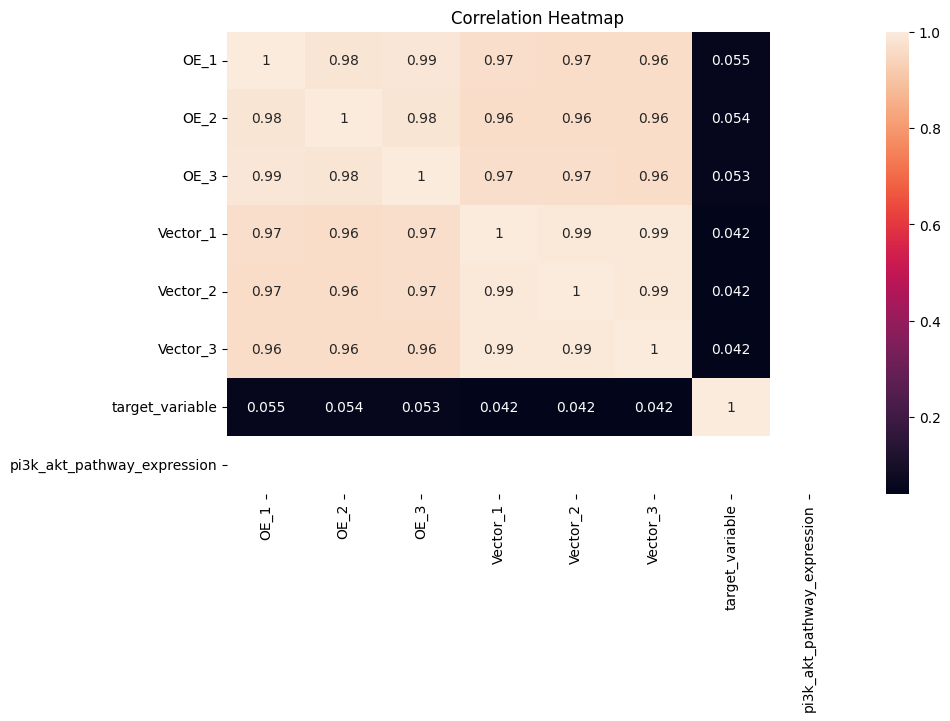

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.title('Correlation Heatmap')
plt.show()